<h1 style="font-size:300%">Spotify Song Ranking Predictor</h1>

Martin Hristev

# 2.Importing Necessary Libraries

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version:", matplotlib.__version__)

Pandas version: 2.2.1
Seaborn version: 0.13.2
Matplotlib version: 3.8.3


# 3. Loading and Exploring the Data

In [96]:
try:
    df = pd.read_csv('./raw_data/universal_top_spotify_songs.csv')
except Exception as e:
    print("An error occurred while reading the CSV file:", e)
    df = None 

df.shape

(525027, 25)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525027 entries, 0 to 525026
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   spotify_id          525027 non-null  object 
 1   name                525004 non-null  object 
 2   artists             525004 non-null  object 
 3   daily_rank          525027 non-null  int64  
 4   daily_movement      525027 non-null  int64  
 5   weekly_movement     525027 non-null  int64  
 6   country             517871 non-null  object 
 7   snapshot_date       525027 non-null  object 
 8   popularity          525027 non-null  int64  
 9   is_explicit         525027 non-null  bool   
 10  duration_ms         525027 non-null  int64  
 11  album_name          524832 non-null  object 
 12  album_release_date  524832 non-null  object 
 13  danceability        525027 non-null  float64
 14  energy              525027 non-null  float64
 15  key                 525027 non-nul

In [98]:
df.describe()

,daily_rank,daily_movement,weekly_movement,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000
mean,25.485581,0.682144,2.905866,77.953513,193772.007282,0.680442,0.646541,5.391083,-6.588387,0.526078,0.097997,0.286679,0.016554,0.176633,0.537978,122.458034,3.892659
std,14.427087,6.463425,12.091318,15.828934,49828.781799,0.141381,0.164093,3.500116,2.686815,0.499320,0.092539,0.260842,0.088189,0.129785,0.229887,28.526451,0.441665
min,1.000000,-49.000000,-49.000000,0.000000,0.000000,0.000000,0.001890,0.000000,-31.356000,0.000000,0.000000,0.000008,0.000000,0.015400,0.000000,0.000000,0.000000
25%,13.000000,-1.000000,-3.000000,67.000000,162461.000000,0.580000,0.544000,2.000000,-8.020000,0.000000,0.039300,0.076200,0.000000,0.098000,0.362000,99.974000,4.000000
50%,25.000000,0.000000,0.000000,82.000000,186666.000000,0.700000,0.668000,6.000000,-6.238000,1.000000,0.059000,0.190000,0.000001,0.121000,0.533000,119.935000,4.000000
75%,38.000000,2.000000,5.000000,90.000000,218998.000000,0.788000,0.762000,8.000000,-4.781000,1.000000,0.115000,0.453000,0.000079,0.219000,0.726000,141.095000,4.000000
max,50.000000,49.000000,49.000000,100.000000,939666.000000,0.988000,0.997000,11.000000,3.233000,1.000000,0.912000,0.996000,0.974000,0.968000,0.992000,217.969000,5.000000


In [99]:
df.sample(10)

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
132438,5RqSsdzTNPX1uzkmlHCFvK,QLONA,"KAROL G, Peso Pluma",7,-1,-3,PE,2024-02-02,93,True,...,7,-7.455,0,0.3070,0.52000,0.000000,0.0892,0.484,169.918,4
180842,1D8HR389yohrWVZ1yHI2bc,היי בייב,Tuna,23,0,-1,IL,2024-01-20,60,False,...,2,-7.552,1,0.0401,0.00956,0.000000,0.1450,0.625,92.033,4
228964,05sO6FK8E9l2cfwnEUTjHq,CUAL ES ESA,"Feid, Pirlo",32,5,14,EC,2024-01-07,81,True,...,6,-4.483,0,0.1940,0.01790,0.000000,0.1210,0.714,95.998,4
400780,6gMj2DzKR2PjrrbNSwcGFR,OA,"Anuel AA, Quevedo, Maluma, Mambo Kingz, DJ Luian",26,0,4,CL,2023-11-21,87,True,...,7,-3.239,1,0.0851,0.17000,0.000000,0.0421,0.647,99.994,4
398314,3vkCueOmm7xQDoJ17W1Pm3,My Love Mine All Mine,Mitski,44,0,-6,SK,2023-11-21,97,False,...,9,-14.958,1,0.0321,0.86800,0.135000,0.1580,0.121,113.950,4
378150,7bPp2NmpmyhLJ7zWazAXMu,TULUM,"Peso Pluma, Grupo Frontera",14,0,-1,GT,2023-11-27,89,True,...,6,-4.454,1,0.0503,0.39400,0.000000,0.1100,0.631,167.767,4
235352,1H3qOzheTPhE7aVvJOWfvA,美しい鰭,SPITZ,26,1,-2,JP,2024-01-05,73,False,...,1,-3.565,1,0.0298,0.01070,0.000290,0.2450,0.747,98.047,4
519973,6Sq7ltF9Qa7SNFBsV5Cogx,Me Porto Bonito,"Bad Bunny, Chencho Corleone",38,0,12,HN,2023-10-19,90,True,...,1,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,4
484155,7iQXYTyuG13aoeHxGG28Nh,PERRO NEGRO,"Bad Bunny, Feid",1,0,1,CR,2023-10-29,95,True,...,5,-2.248,1,0.2620,0.08870,0.000022,0.1790,0.345,96.057,4
189331,6bCLkzoE3agC7Ws9NxVxIn,Крепче,KRBK,21,-3,-3,BY,2024-01-18,67,False,...,9,-14.249,0,0.3720,0.87200,0.000000,0.1440,0.710,77.994,4


# 4. Data Cleaning and Preprocessing

To ensure the project focuses on the Global Spotify ranking, it is necessary to exclude all records associated with specific countries. Having `N/A` value in `country` column means that the ranking is `Global`.


In [100]:
df = df[df['country'].isna()]
df.shape

(7156, 25)

Get only the highest rank for each song, as we want the model to predict the song's highest achievable rank.

In [101]:
df = df.loc[df.groupby("spotify_id")['daily_rank'].idxmin()]
df.shape

(272, 25)

Checking for missing values.

In [102]:
df.isna().sum()

spotify_id              0
name                    0
artists                 0
daily_rank              0
daily_movement          0
weekly_movement         0
country               272
snapshot_date           0
popularity              0
is_explicit             0
duration_ms             0
album_name              1
album_release_date      1
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
dtype: int64

Check the missing values in the album section

In [103]:
df[df['album_name'].isnull()]

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
266368,4HEOgBHRCExyYVeTyrXsnL,Jingle Bells - Remastered 1999,Frank Sinatra,25,3,25,NaN,2023-12-27,88,False,...,8,-13.119,1,0.0498,0.727,0.0,0.0977,0.951,174.609,4


We can conveniently search and retrieve the missing values from Spotify itself, ensuring that no data is lost.

In [104]:
df['album_name'] = df['album_name'].fillna('A Jolly Christmas From Frank Sinatra')
df['album_release_date'] = df['album_release_date'].fillna('1957-09-21')

Confirm that all missing values have been resolved.

In [105]:
df.isna().sum()

spotify_id              0
name                    0
artists                 0
daily_rank              0
daily_movement          0
weekly_movement         0
country               272
snapshot_date           0
popularity              0
is_explicit             0
duration_ms             0
album_name              0
album_release_date      0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
dtype: int64

Check for duplicated rows

In [106]:
df[df.duplicated()].sum()

spotify_id              0
name                    0
artists                 0
daily_rank              0
daily_movement          0
weekly_movement         0
country                 0
snapshot_date           0
popularity              0
is_explicit             0
duration_ms             0
album_name              0
album_release_date      0
danceability          0.0
energy                0.0
key                     0
loudness              0.0
mode                    0
speechiness           0.0
acousticness          0.0
instrumentalness      0.0
liveness              0.0
valence               0.0
tempo                 0.0
time_signature          0
dtype: object

Replace the boolean values True and False in the 'is_explicit' column with the corresponding integer values 1 and 0.

In [107]:
df['is_explicit'] = df['is_explicit'].map({True: 1, False: 0})

Convert the dates to datetime format for easier manipulation and analysis.

In [108]:
df['album_release_date'] = pd.to_datetime(df['album_release_date'])
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])

Create a new column to represent the number of days since the song's release and include the release year information.

In [109]:
df['release_year'] = df['album_release_date'].dt.year
df['days_since_release'] = (df['snapshot_date'] - df['album_release_date']).dt.days

Convert the song duration from milliseconds to minutes.

In [110]:
df['duration_min']= round(df['duration_ms'] / (1000*60), 2)

Drop irrelevant columns.

In [111]:
df.drop(labels=["spotify_id", 
                "artists", 
                "name", 
                "country", 
                "daily_movement",
                "weekly_movement",
                "album_name",
                "duration_ms",
                "album_release_date",
                "snapshot_date",
                "popularity",
                ], axis=1, inplace=True)


To provide a clear and accurate representation of the data, we have renamed the column `daily rank` to `highest rank`. This renaming is necessary because we have filtered the dataset to include only the highest rank for each song.

In [112]:
df.rename(columns={'daily_rank': 'highest_rank'}, inplace=True)

# 5. Feature Selection

To analyze the correlations between the features and the `highest_rank` column, we generate a heatmap. This heatmap provides a visual representation of the relationships between the variables in the dataset.

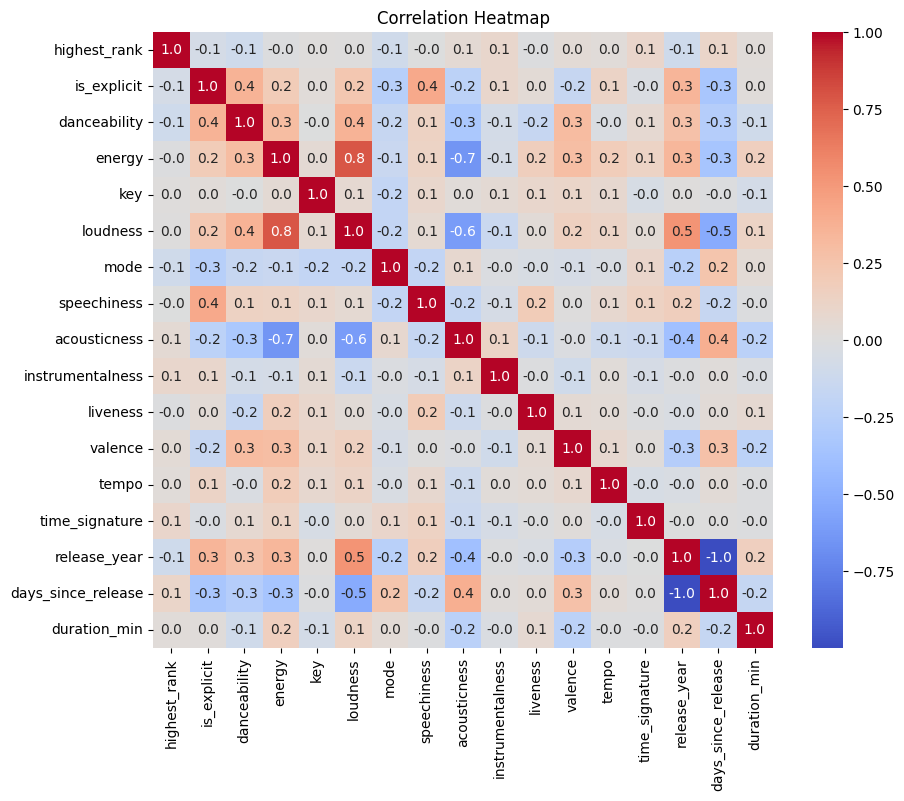

In [113]:
correlations = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

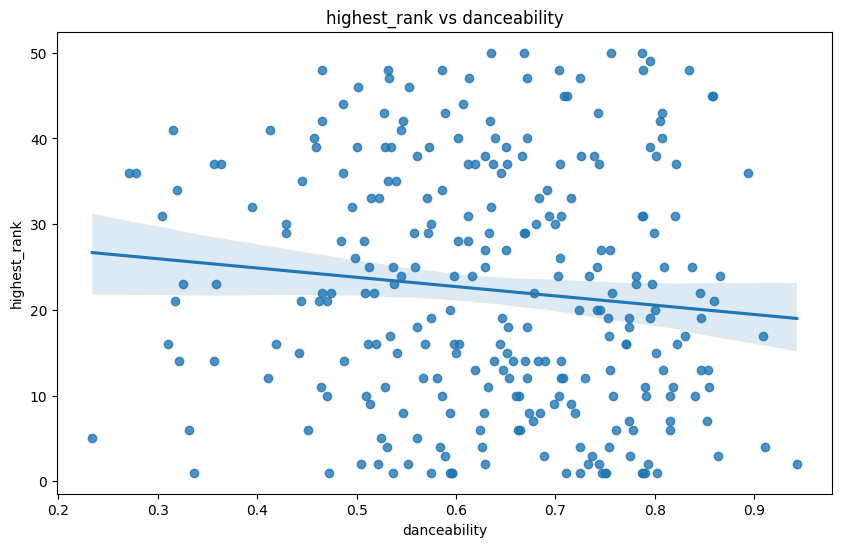

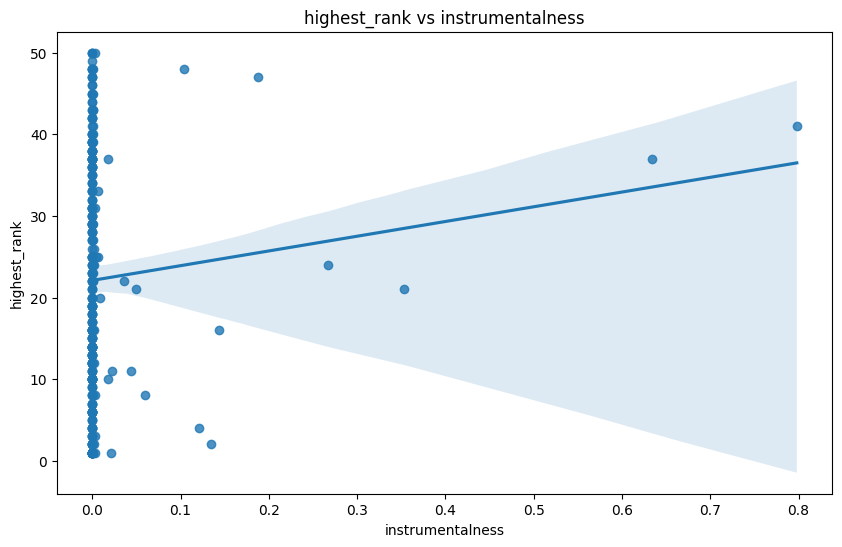

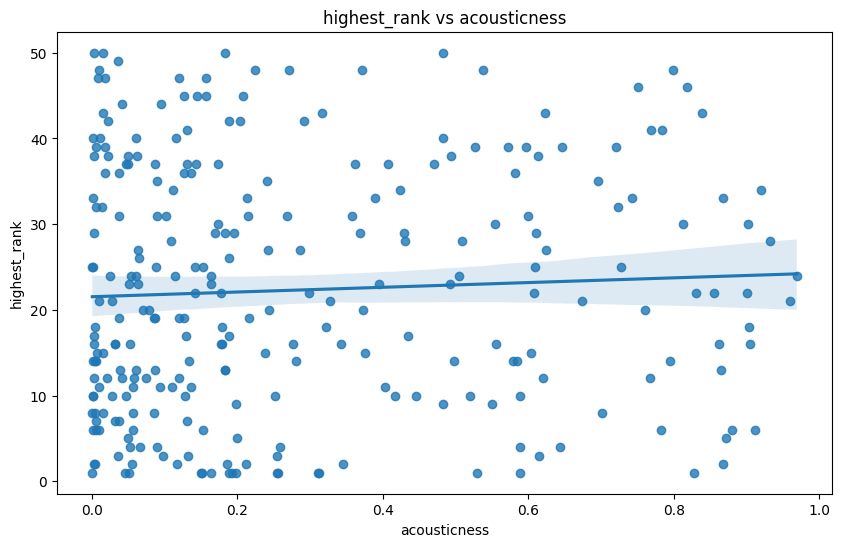

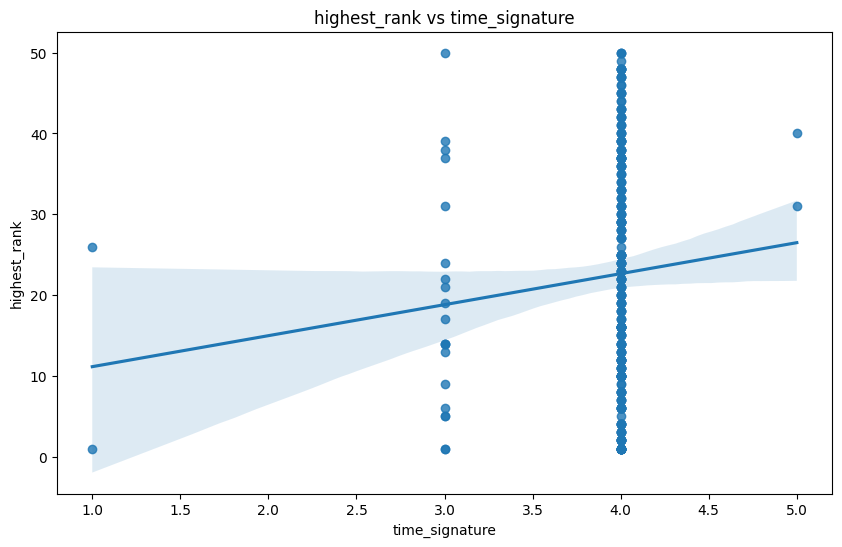

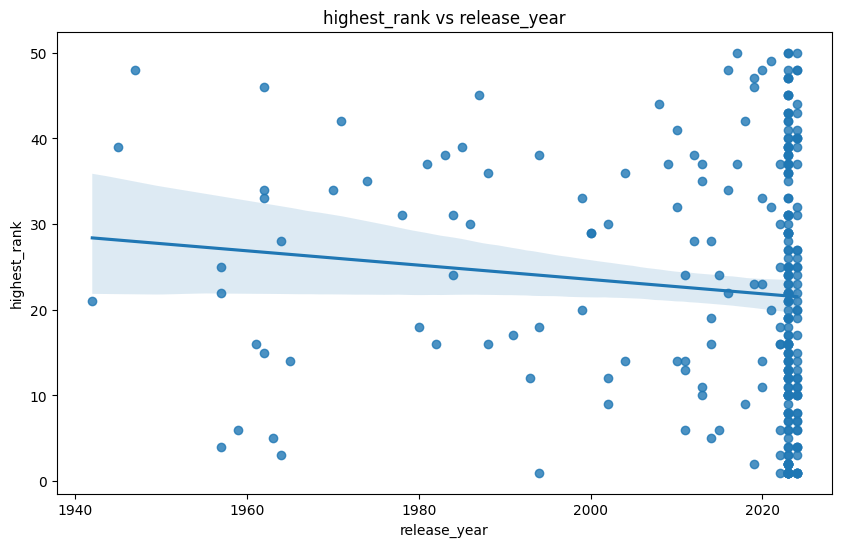

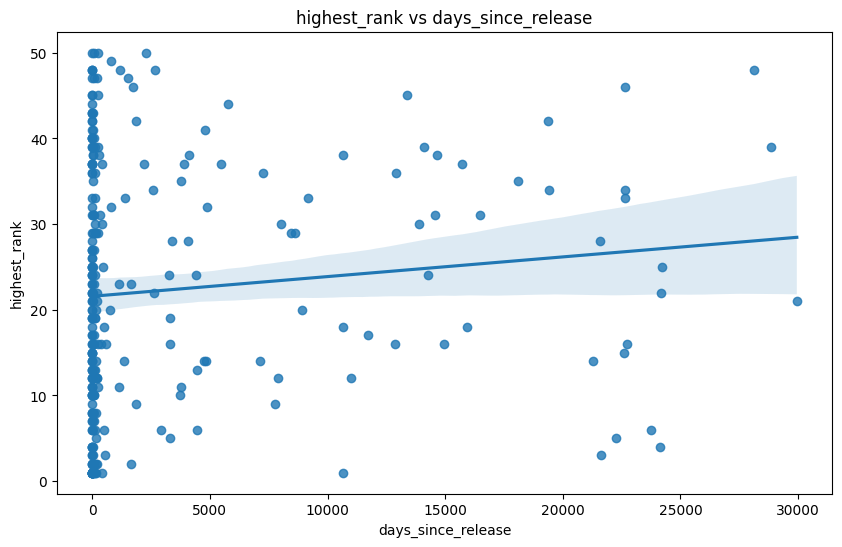

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['danceability', 'instrumentalness', 'acousticness', 'time_signature', 'release_year', 'days_since_release']
'mode', 'is_explicit'
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df[feature], y=df['highest_rank'], data=df, scatter=True, fit_reg=True)
    plt.xlabel(feature)
    plt.ylabel('highest_rank')
    plt.title(f'highest_rank vs {feature}')
    plt.show()




Only thing that we can get from those plots is that ofcourse most of the popular daily songs are the new songs, released this year or the year ago and this is proven by comparing the `highest rank` with `days_since_reelase` and `release_year`.

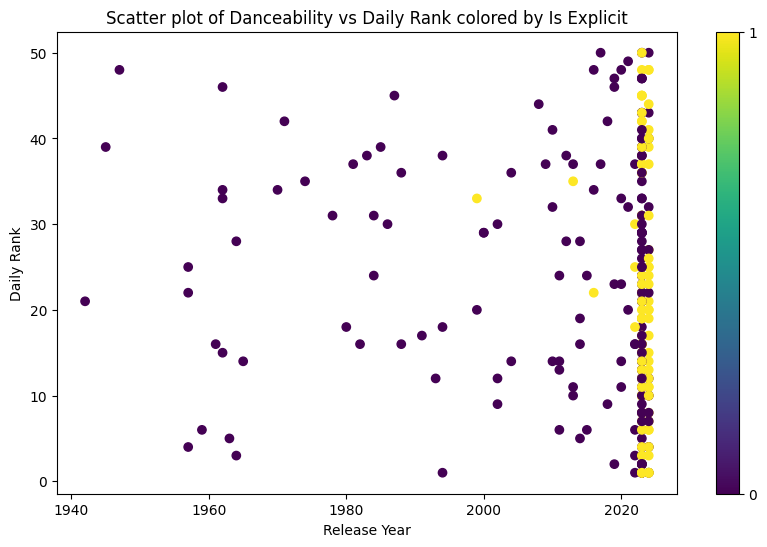

In [115]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['release_year'], df['highest_rank'], c=df['is_explicit'], vmin=0, vmax=1)
plt.xlabel('Release Year')
plt.ylabel('Daily Rank')
plt.title('Scatter plot of Danceability vs Daily Rank colored by Is Explicit')
plt.colorbar(scatter, ticks=[0, 1])
plt.show()


Unfortunately, the analysis reveals no significant correlation between the `highest rank` and the other features that exhibited high correlation in the map. This lack of correlation might suggest that the success of a song, as measured by its highest rank, cannot be easily predicted by these features. This finding underscores the subjective nature of music as an art form.

In [ ]:
X = df[['danceability', 'mode', 'acousticness', 'is_explicit', 'time_signature']]
y = df['highest_rank']

# 6. Splitting the Data

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RMSE scores for each fold:  [-0.02915886 -0.20158393 -0.09076827 -0.05737508 -0.01901583]
Mean Squared Error: 140.69484419506176
Root Mean Squared Error: 11.861485749899199


# 7. Model Bulding

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
                              n_estimators=38, 
                              random_state=42, 
                              max_features="sqrt", 
                              max_depth=10,
                              ccp_alpha=0.5
                              )



# 8. Model Training

In [ ]:
model.fit(X_train, y_train)

# 9. Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("RMSE scores for each fold: ", scores)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

In [117]:
new_features = pd.DataFrame({
    'danceability': [0.594],
    'mode': [1],
    'acousticness': [0.189],
    'is_explicit': [1],
    'time_signature': [4]
})
predicted_rank = model.predict(new_features)

print(f"Predicted highest rank: {predicted_rank[0]}")

Predicted highest rank: 14.85473860934387


In [118]:
from itertools import combinations
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

features = ['danceability', 'instrumentalness', 'mode', 'acousticness', 'is_explicit', 'time_signature', 'release_year', 'days_since_release']

target = 'highest_rank'

model = RandomForestRegressor(random_state=42)

best_mse = float('inf')
best_features = None

for r in range(1, len(features) + 1):
    for feature_combination in combinations(features, r):

        X_train, X_test, y_train, y_test = train_test_split(df[list(feature_combination)], df[target], test_size=0.2, random_state=42)

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)

        if mse < best_mse:
            best_mse = mse
            best_features = feature_combination

print(f"Best MSE: {best_mse}")
print(f"Best feature combination: {best_features}")



Best MSE: 157.02224181818178
Best feature combination: ('danceability', 'acousticness', 'is_explicit', 'time_signature')


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score

X = df[['danceability', 'acousticness', 'is_explicit', 'time_signature']]
y = df['highest_rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(
                              n_estimators=41, 
                              random_state=42, 
                              max_depth=22,
                              ccp_alpha=0.2,
                              min_impurity_decrease=0.1,
                              )
# 'friedman_mse', 'poisson', 'absolute_error', 'squared_error'
scores = cross_val_score(model, X, y, cv=5)
print("RMSE scores for each fold: ", np.sqrt(-scores))
mse_scores = -scores
print("Mean RMSE: ", (np.sqrt(mse_scores)).mean())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


RMSE scores for each fold:  [0.23223666 0.55443017 0.41755228 0.38159033 0.38444533]
Mean RMSE:  0.39405095433065307
Mean Squared Error: 150.29260227990227
Root Mean Squared Error: 12.259388332209005


# Conclusion

After experimenting with different features and model configurations, I have come to different conclusions about the model. The choice of features greatly impacts the performance and predictive power of the model. By including or excluding certain features, I observed variations in the mean squared error (MSE) and root mean squared error (RMSE) values.

Additionally, the model configuration, such as the number of estimators, maximum depth, and regularization parameters, also played a significant role in the model's performance. Different combinations of these parameters resulted in different levels of accuracy and predictive power.

Although I observed variations in the mean squared error (MSE) and root mean squared error (RMSE) values when experimenting with different features and model configurations, I did not find a high correlation between the features. This suggests that music popularity is subjective and cannot be solely determined by a few specific features.

In future iterations, I plan to enhance the dataset by incorporating additional features obtained from the Spotify API. This will allow for further investigation into the subjective nature of music and its impact on popularity. By expanding the dataset, I aim to gain deeper insights into the factors that contribute to the subjective nature of music and its influence on popularity.



Unfortunately, the analysis reveals no significant correlation between the `highest rank` and the other features that exhibited high correlation in the map. This lack of correlation might suggest that the success of a song, as measured by its highest rank, cannot be easily predicted by these features. This finding underscores the subjective nature of music as an art form. It reminds us that while certain patterns and trends can be observed, the appeal of a song often transcends quantifiable characteristics, resonating with listeners on a deeply personal and emotional level.